#### Visualizations

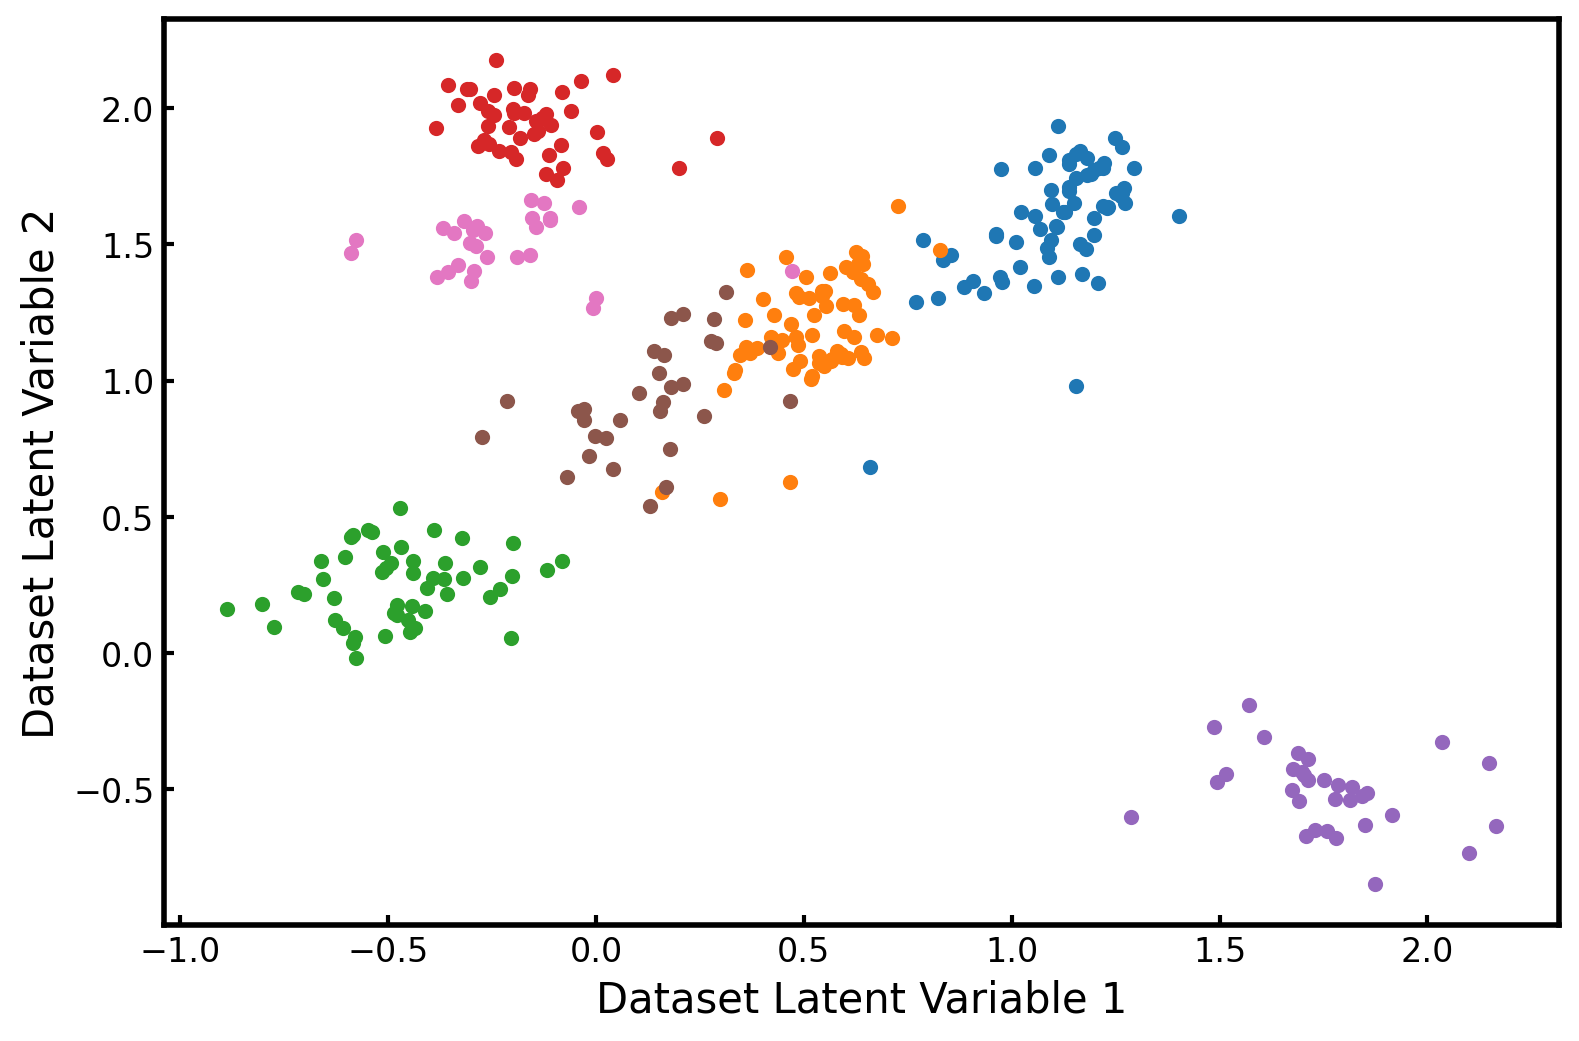

In [ ]:
datasets_embed, __, __ = autoencoder1.enc.forward(datasets_dense_torch.float().to(device))
datasets_embed = datasets_embed.cpu().detach().numpy()

figure = plt.figure(figsize = [9, 6], dpi = 200)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#FF0000','#800080','#FFA500', '#008080','#00FF00', '#FFD700','black']
for i in range(4,11):
  # data_rand_color.append(np.random.rand(3,))
  plt.scatter(datasets_embed[:,0][datasets_idx[i]], datasets_embed[:,1][dtaests_idx[i]], s=20, label = data_clusters[i-4], c = colors[i-4])
plt.xticks(fontsize = 12)
plt.yticks(fontsize=12)
frame_tick()
# legend(fontsize = 10)
plt.xlabel('Dataset Latent Variable 1', fontsize = 15)
plt.ylabel('Dataset Latent Variable 2', fontsize = 15)
# filename = 'figures/VAE-NCF/10222021/1_2_2/v2_dataset2D_VAENCF_epoch20_1lambda1_2lambda2_2lambda3_e-5lambda4.jpg'
# savefig(filename)
plt.show()

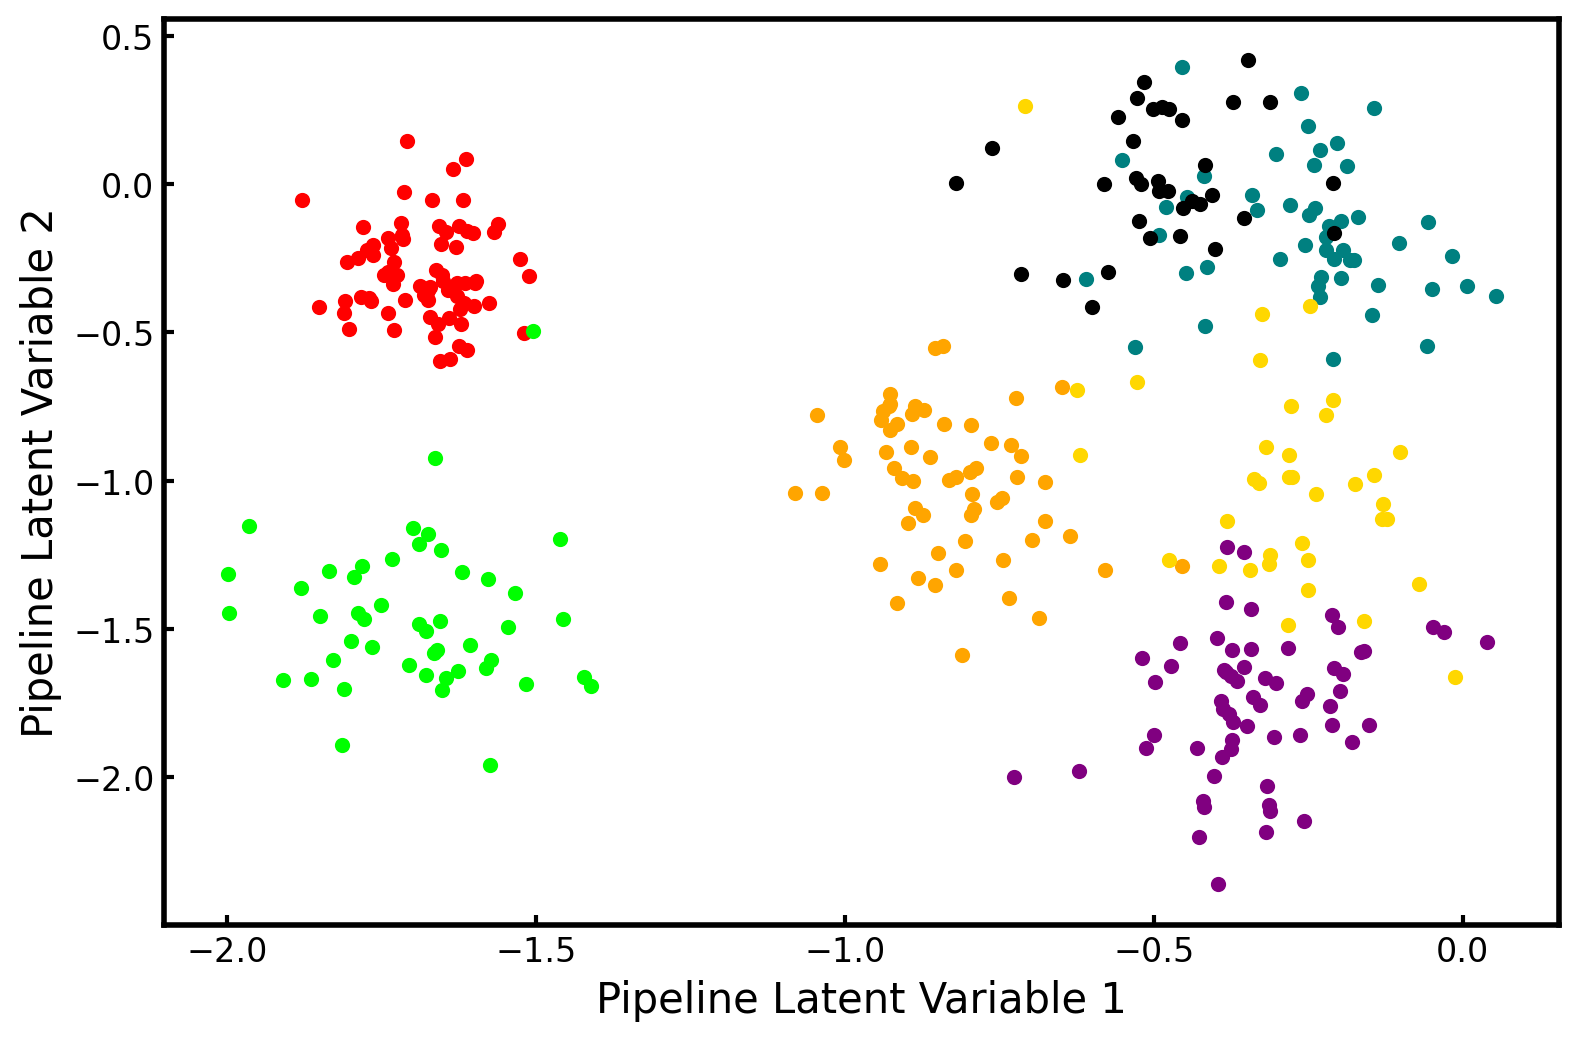

In [ ]:
pipelines_embed, __, __ = autoencoder2.enc.forward(pipelines_dense_torch.float().to(device))
pipleines_embed = pipelines_embed.cpu().detach().numpy()

figure = plt.figure(figsize = [9, 6], dpi = 200)
# pipeline_rand_color = []
for i in range(3,10):
  # pipeline_rand_color.append(np.random.rand(3,))
  plt.scatter(pipelines_embed[:,0][pipelines_idx[i]], pipelines_embed[:,1][pipelines_idx[i]], s=20, label = pipeline_clusters[i-3], c=colors[i-3+7])
plt.xticks(fontsize = 12)
plt.yticks(fontsize=12)
frame_tick()
# legend(fontsize = 10)
plt.xlabel('Pipeline Latent Variable 1', fontsize = 15)
plt.ylabel('Pipeline Latent Variable 2', fontsize = 15)
# filename = 'figures/VAE-NCF/10222021/1_2_2/v2_pipeline2D_VAENCF_epoch20_1lambda1_2lambda2_2lambda3_e-5lambda4.jpg'
# savefig(filename)
plt.show()

### P

## Mesh Grids

In [ ]:
l1 = np.arange(datasets_dense.shape[0])
l2 = np.arange(pipelines_dense.shape[0])
df_permutation = pd.DataFrame(list(itertools.product(l1, l2)), columns=['l1', 'l2'])
all_permutation = df_permutation.values
X_all = torch.from_numpy(all_permutation)

In [ ]:
# dataset meshgrid
#32*32
###########
#10_10
# X1 = np.arange(-1.5, 2.02, 0.11)
# X2 = np.arange(-3.2, 0, 0.1)
# X1 = np.arange(-0.7, 2.5, 0.1)
# X2 = np.arange(-2, 0.4, 0.075)
##########
#15_15
# X1 = np.arange(-1.5, 2.02, 0.11)
# X2 = np.arange(-3.2, 0, 0.1)
# X1 = np.arange(-1.2, 2, 0.1)
# X2 = np.arange(-2.4, 0, 0.075)
##########
#5_5
X1 = np.arange(-1, 2.2, 0.1)
X2 = np.arange(-1, 2.2, 0.1)
# X1 = np.arange(-2.3, 2.5, 0.15)
# X2 = np.arange(-1, 0.92, 0.06)
##########
#2_2
# X1 = np.arange(-1.2, 2, 0.1)
# X2 = np.arange(-2.5, 2.3, 0.15)
##########
X1, X2 = np.meshgrid(X1, X2)
X = np.dstack((X1,X2))
X = np.reshape(X, (X.shape[0]*X.shape[1],2))
X = torch.from_numpy(X)
print(X.shape)
##########################################
# pipeline meshgrid
#32*32
###########
#10_10
# Y1 = np.arange(-3, -0.44, 0.08)
# Y2 = np.arange(-1.5, 1.06, 0.08)
# Y1 = np.arange(-2.3, 2.5, 0.15)
# Y2 = np.arange(-1.6, 0, 0.05)
##########
#5_5
Y1 = np.arange(-2.06, 0.5, 0.08)
Y2 = np.arange(-1.92, 0, 0.06)
# Y1 = np.arange(0, 1.6, 0.05)
# Y2 = np.arange(-2.3, 2.5, 0.15)
##########
#2_2
# Y1 = np.arange(-2.3, 2.5, 0.15)
# Y2 = np.arange(-1.2, 2, 0.1)
##########
Y1, Y2 = np.meshgrid(Y1, Y2)
Y = np.dstack((Y1,Y2))
Y = np.reshape(Y, (Y.shape[0]*Y.shape[1],2))
Y = torch.from_numpy(Y)
print(Y.shape)
##########################################

l1 = np.arange(X.shape[0])
l2 = np.arange(Y.shape[0])
df_permutation = pd.DataFrame(list(itertools.product(l1, l2)), columns=['l1', 'l2'])
all_permutation = df_permutation.values
print(all_permutation.shape)
X_all = torch.from_numpy(all_permutation)
print(X_all.shape)
########################

out_all = decoder(X, Y, X_all)
out_all = F.softmax(out_all,dim=1)
pred_all = out_all.max(1, keepdim=True)[0]
print(pred_all.shape)
########################

torch.Size([1024, 2])
torch.Size([1024, 2])
(1048576, 2)
torch.Size([1048576, 2])
torch.Size([1048576, 1])


In [ ]:
row = dict()
row['dataID'] = all_permutation[:,0]
row['pipelineID'] = all_permutation[:,1]
row['prediction'] = pred_all.squeeze().detach().numpy()
df_predictions = pd.DataFrame(row, columns=['dataID', 'pipelineID', 'prediction'])
df_predmat = df_predictions.pivot_table(index='dataID', columns='pipelineID', values='prediction')
pred_matrix = df_predmat.values

In [ ]:
#save the predictions
df_predmat.to_csv('predictions/10222021/v2_predmat_VAE-NCF_grid32x32_epoch20_1lambda1_5lambda2_5lambda3_e-5lambda4_0.01lr.csv', index = False)

In [ ]:
# load predictions
# df_predmat = pd.read_csv('predictions/10222021/v3_predmat_VAE-NCF_grid32x32_epoch20_1lambda1_15lambda2_15lambda3_e-5lambda4_0.01lr.csv')
df_predmat = pd.read_csv('predictions/predmat_VAE-NCF_grid32x32_10epoch_1lambda1_15lambda2_e-5lambda3.csv')
pred_matrix = df_predmat.values
print(pred_matrix.shape)

(1024, 1024)


In [ ]:
#cluster of all the 

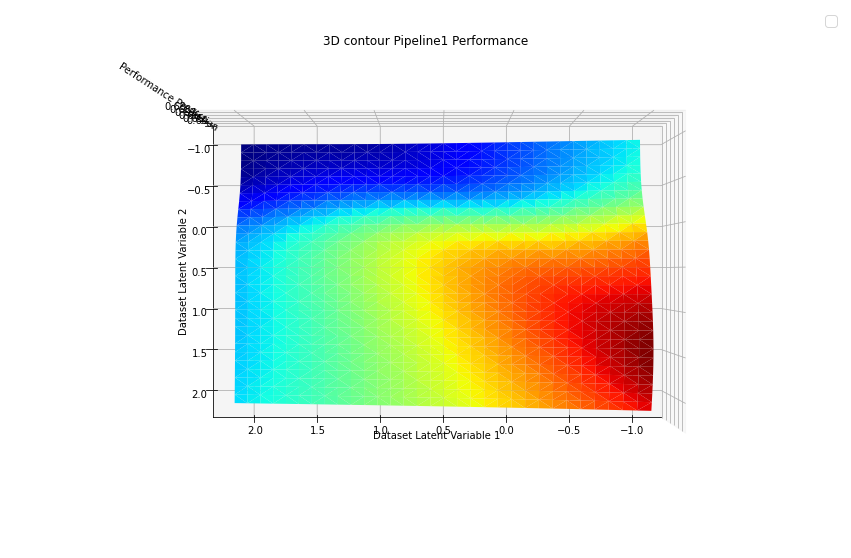

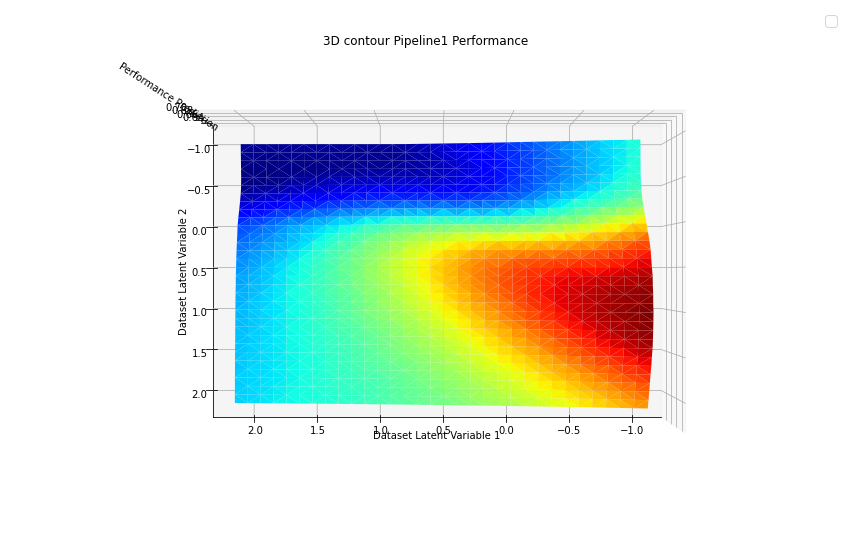

In [ ]:
XZ = np.mean(pred_matrix,1)
XZ2 = np.median(pred_matrix,1)
##############################

#visualize
figure = plt.figure(figsize = [15, 10])
ax = plt.axes(projection='3d')
# Plot the surface.
tri = mtri.Triangulation(X[:,0],X[:,1])
ax.plot_trisurf(X[:,0], X[:,1], XZ + 0.1, triangles=tri.triangles, cmap=plt.cm.jet)
# surf = ax.plot_surface(X1, X2, XZ, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel('Dataset Latent Variable 1')
ax.set_ylabel('Dataset Latent Variable 2')
ax.set_zlabel('Performance Prediction')
ax.set_title('3D contour Pipeline1 Performance')
# ax.set_zlim(zmin=0.6, zmax =1)
ax.view_init(90,90)
ax.legend(fontsize=15)
# filename = 'figures/VAE-NCF/datasets/0.9_0.1/mean_1_10epoch_0.9lambda1_0.1lambda2_e-4lambda3.jpg'
# plt.savefig(filename, bbox_inches = 'tight')
plt.show()


##############################
#visualize
figure = plt.figure(figsize = [15, 10])
ax = plt.axes(projection='3d')
# Plot the surface.
tri = mtri.Triangulation(X[:,0],X[:,1])
ax.plot_trisurf(X[:,0], X[:,1], XZ2 + 0.1, triangles=tri.triangles, cmap=plt.cm.jet)
# surf = ax.plot_surface(X1, X2, XZ, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel('Dataset Latent Variable 1')
ax.set_ylabel('Dataset Latent Variable 2')
ax.set_zlabel('Performance Prediction')
ax.set_title('3D contour Pipeline1 Performance')
# ax.set_zlim(zmin=0.6, zmax =1)
ax.view_init(90, 90)
ax.legend(fontsize=15)
# filename = 'figures/VAE-NCF/datasets/0.9_0.1/median_1_10epoch_0.9lambda1_0.1lambda2_e-4lambda3.jpg'
# plt.savefig(filename, bbox_inches = 'tight')
plt.show()

# Dataset plots in Pipeline Grid

In [ ]:
for i in range(pred_matrix.shape[1]):
    fig = plt.figure(constrained_layout=True, figsize=(5,5))
    print(i)
    XZ = pred_matrix[:,i]
    #visualize
    ax = plt.gca(projection = '3d')
    # Plot the surface.
    tri = mtri.Triangulation(X[:,0], X[:,1])
    ax.plot_trisurf(X[:,0], X[:,1], XZ , triangles=tri.triangles, cmap=plt.cm.jet)
    ax.set_axis_off()
    ax.view_init(90,90)
    ax.autoscale_view('tight')
    ax.margins(x=-0.48, y=-0.48)
    filename = 'figures/VAE-NCF/10222021/1_5_5/grid32x32/pipelines3/v2_pipe%d_grid32x32_epoch20_1lambda1_5lambda2_5lambda3_e-5lambda4_0.01lr.jpg'%(i+1)
    plt.savefig(filename, bbox_inches = 'tight', pad_inches= -0.8)
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
all_files = sorted(glob.glob("figures/VAE-NCF/10222021/1_5_5/grid32x32/pipelines3/*.jpg"), key=os.path.getmtime)
l_train = []
l_test = []
l = []
# train_length = int(0.8*len(all_files))
npix = 224
target_size = (npix,npix,3)
all_specs = torch.empty((len(all_files),3, npix, npix))
i=0
fig = plt.figure(constrained_layout=True, figsize=(20,20))
##########################
for filename in all_files:
    print(i)
    ss_img = load_img(filename, target_size=target_size)
    ax = fig.add_subplot(32,32,i+1)
    ax.imshow(ss_img)
    ax.set_axis_off()
#         ss = transforms.ToTensor()(ss_img)
#         all_specs[i,:,:] = ss
    i += 1
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
filename = 'figures/VAE-NCF/10222021/1_5_5/grid32x32/arrange/v2_pipegrid_alldata_epoch20_1lambda1_5lambda2_5lambda3_e-5lambda4_0.01lr.jpg'
fig.savefig(filename, bbox_inches = 'tight',dpi=600)
plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


# Wrap Picture around Sphere

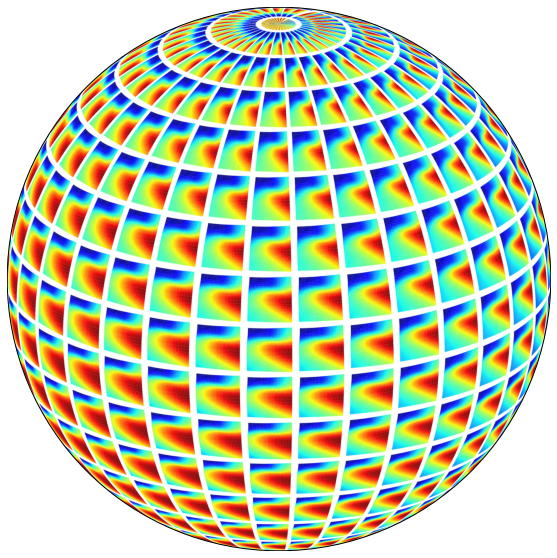

In [ ]:
# !pip install https://github.com/matplotlib/basemap/archive/master.zip
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# !pip install gifmaker
from gifly import gif_maker

# img = 'figures/VAE-NCF/datasets/individuals/grid32x32/arrange/v5_Pipegrid_alldata_10epoch_1lambda1_15lambda2_e-5lambda3.jpg'
# img = 'figures/VAE-NCF/10222021/1_10_10/grid32x32/arrange/crop3_v5_Pipegrid_alldata_10epoch_1lambda1_15lambda2_e-5lambda3.jpg'
img = 'figures/VAE-NCF/10222021/1_5_5/grid32x32/arrange/v2_pipegrid_alldata_epoch20_1lambda1_5lambda2_5lambda3_e-5lambda4_0.01lr.jpg'
# img = 'figures/VAE-NCF/10222021/1_10_10/grid32x32/arrange/v5-2_0.2noise_pipegrid_alldata_epoch20_1lambda1_10lambda2_10lambda3_e-5lambda4_0.01lr.jpg'

fig = plt.figure(figsize=(10,10))
lat_viewing_angle = 20
lon_viewing_angle = 30

map = Basemap(projection='ortho', lat_0=lat_viewing_angle, lon_0=lon_viewing_angle)
map.warpimage(img)

# plt.savefig('figures/VAE-NCF/datasets/individuals/grid32x32/arrange/crop_Pipeworld_alldata_1lambda1_15lambda2_e-5lambda3.jpg', bbox_inches='tight')
plt.savefig('figures/VAE-NCF/10222021/1_5_5/grid32x32/arrange/v3_pipeworld_sphere_epoch20_1lambda1_5lambda2_5lambda3_e-5lambda4_0.01lr.jpg', bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
plt.ion()
fig = plt.figure(figsize=(10,10))
# set the latitude angle steady, and vary the longitude. You can also reverse this to
# create a rotating globe latitudinally as well
lat_viewing_angle = [20.0,20.0]
lon_viewing_angle = [180,-180]
rotation_steps = 30
lat_vec = np.linspace(lat_viewing_angle[0],lat_viewing_angle[1],rotation_steps)
lon_vec = np.linspace(lon_viewing_angle[0],lon_viewing_angle[1],rotation_steps)
print("lat_vec",lat_vec)
print("lon_vec",lon_vec)

# for making the gif animation
gif_indx = 0
img = 'figures/VAE-NCF/10222021/1_5_5/grid32x32/arrange/crop2_pipegrid_alldata_epoch20_1lambda1_5lambda2_5lambda3_e-5lambda4_0.01lr.jpg'
for pp in range(0,len(lat_vec)):
    fig = plt.figure(figsize=(10,10))
    m = Basemap(projection='ortho', lat_0=lat_vec[pp], lon_0=lon_vec[pp])
    m.warpimage(img)
    
    # show the plot, introduce a small delay to allow matplotlib to catch up
    # plt.savefig('figures/VAE-NCF/datasets/individuals/grid32x32/arrange/sphere_pipe/rot%d_Pipeworld_alldata_1lambda1_15lambda2_e-5lambda3.jpg'%(pp+1), bbox_inches='tight')
    plt.savefig('figures/VAE-NCF/10222021/1_5_5/grid32x32/arrange/sphere_pipe/v2/v2_rot%d_pipeworld.jpg'%(pp+1), bbox_inches='tight',dpi=200)
    plt.show()
    plt.pause(0.01)
    # iterate to create the GIF animation
    # gif_maker('basemap_rotating_globe.gif','figures/VAE-NCF/10222021/1_10_10/grid32x32/arrange/sphere_pipe/',gif_indx,len(lat_vec)-1,dpi=90)
    gif_indx+=1
    # plt.cla()
    plt.close()

Output hidden; open in https://colab.research.google.com to view.

# Pipeline plots in Dataset grid

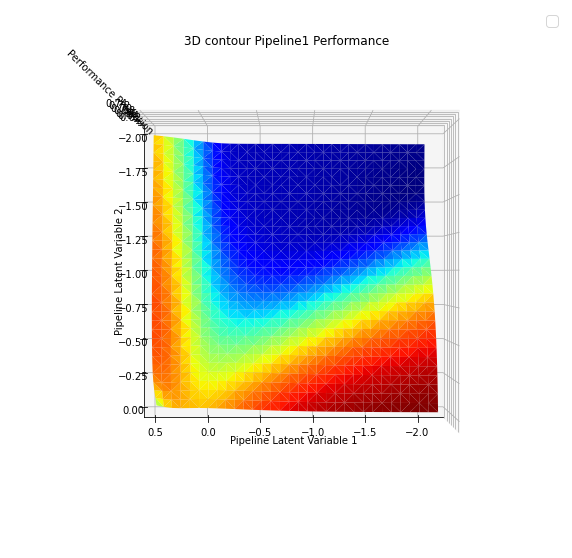

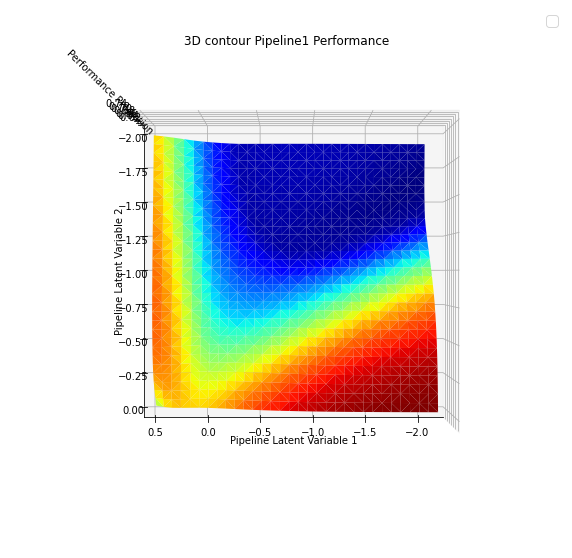

In [ ]:
YZ = np.mean(pred_matrix,0)
YZ2 = np.median(pred_matrix,0)
##############################

#visualize
figure = plt.figure(figsize = [10, 10])
ax = plt.axes(projection='3d')
# Plot the surface.
tri = mtri.Triangulation(Y[:,0],Y[:,1])
ax.plot_trisurf(Y[:,0], Y[:,1], YZ + 0.1, triangles=tri.triangles, cmap=plt.cm.jet)
# surf = ax.plot_surface(Y1, Y2, YZ, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel('Pipeline Latent Variable 1')
ax.set_ylabel('Pipeline Latent Variable 2')
ax.set_zlabel('Performance Prediction')
ax.set_title('3D contour Pipeline1 Performance')
# ax.set_zlim(zmin=0.6, zmax =1)
ax.view_init(90, 90)
ax.legend(fontsize=15)
# filename = 'figures/VAE-NCF/pipelines/0.9_0.1/meean_1_10epoch_0.9lambda1_0.1lambda2_e-6lambda3.jpg'
# plt.savefig(filename, bbox_inches = 'tight')
plt.show()

##############################
#visualize
figure = plt.figure(figsize = [10, 10])
ax = plt.axes(projection='3d')
# Plot the surface.
tri = mtri.Triangulation(Y[:,0],Y[:,1])
ax.plot_trisurf(Y[:,0], Y[:,1], YZ2 + 0.1, triangles=tri.triangles, cmap=plt.cm.jet)
# surf = ax.plot_surface(Y1, Y2, YZ, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlabel('Pipeline Latent Variable 1')
ax.set_ylabel('Pipeline Latent Variable 2')
ax.set_zlabel('Performance Prediction')
ax.set_title('3D contour Pipeline1 Performance')
# ax.set_zlim(zmin=0.6, zmax =1)
ax.view_init(90, 90)
ax.legend(fontsize=15)
# filename = 'figures/VAE-NCF/pipelines/0.9_0.1/median_1_10epoch_0.9lambda1_0.1lambda2_e-6lambda3.jpg'
# plt.savefig(filename, bbox_inches = 'tight')
plt.show()

In [ ]:
for i in range(pred_matrix.shape[0]):
    fig = plt.figure(constrained_layout=True,figsize = [5, 5])
    print(i)
    YZ = pred_matrix[i,:]
    #visualize
    ax = plt.gca(projection = '3d')
    # Plot the surface.
    tri = mtri.Triangulation(Y[:,0], Y[:,1])
    ax.plot_trisurf(Y[:,0], Y[:,1], YZ , triangles=tri.triangles, cmap=plt.cm.jet)
    ax.set_axis_off()
    ax.view_init(90,90) 
    ax.autoscale_view('tight')
    ax.margins(x=-0.45, y=-0.45)
    filename = 'figures/VAE-NCF/10222021/1_5_5/grid32x32/datasets3/v2_data%d_grid32x32_epoch20_1lambda1_5lambda2_5lambda3_e-5lambda4_0.01lr.jpg'%(i+1)
    plt.savefig(filename, bbox_inches = 'tight', pad_inches= -0.8)
    plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
all_files = sorted(glob.glob("figures/VAE-NCF/10222021/1_15_15/grid32x32/datasets3/*.jpg"), key=os.path.getmtime)
l_train = []
l_test = []
l = []
# train_length = int(0.8*len(all_files))
npix = 224
target_size = (npix,npix,3)
all_specs = torch.empty((len(all_files),3, npix, npix))
i=0
fig = plt.figure(constrained_layout=False, figsize=(20,20))
##########################
for filename in all_files:
    print(i)
    ss_img = load_img(filename, target_size=target_size)
    ax = fig.add_subplot(32,32,i+1)
    ax.imshow(ss_img)
    ax.set_axis_off()
#         ss = transforms.ToTensor()(ss_img)
#         all_specs[i,:,:] = ss
    i += 1
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
filename = 'figures/VAE-NCF/10222021/1_15_15/grid32x32/arrange/v4_datagrid_allpipe_epoch20_1lambda1_15lambda2_15lambda3_e-5lambda4_0.01lr.jpg'
fig.savefig(filename, bbox_inches = 'tight', dpi=600)
plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

No handles with labels found to put in legend.


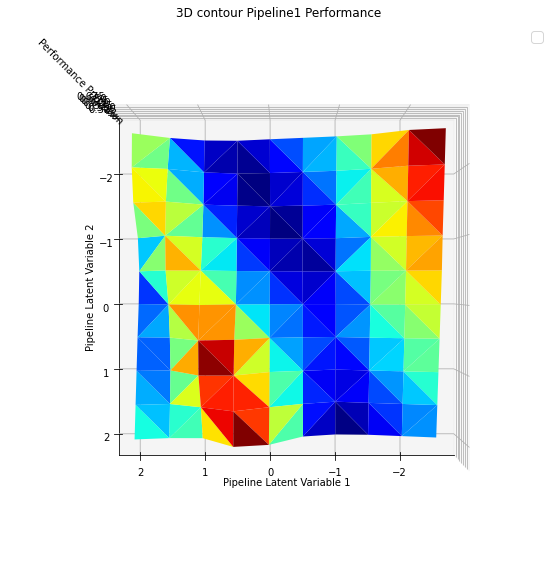

No handles with labels found to put in legend.


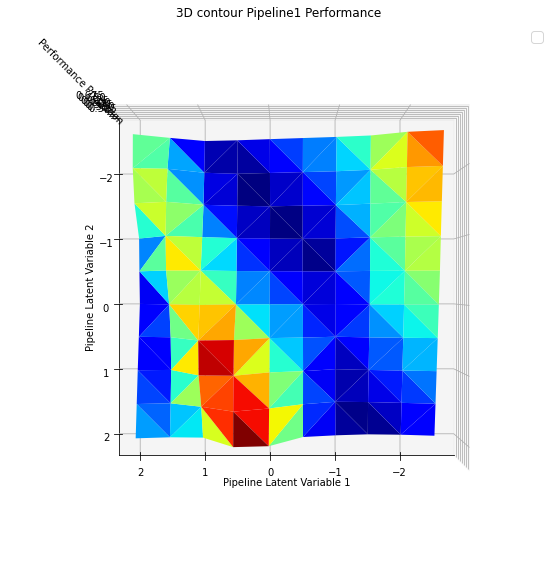

No handles with labels found to put in legend.


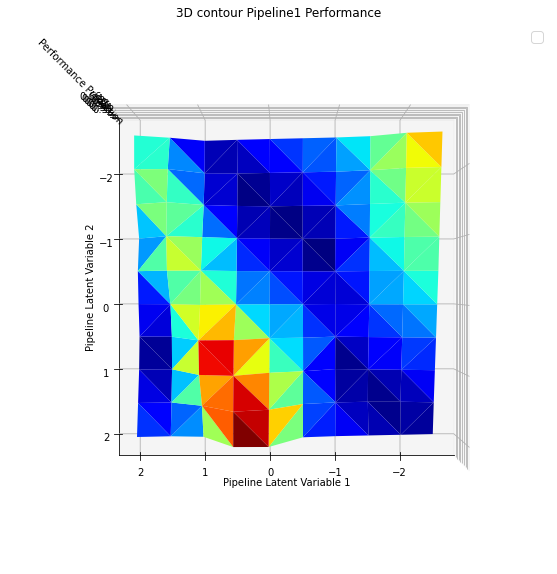

No handles with labels found to put in legend.


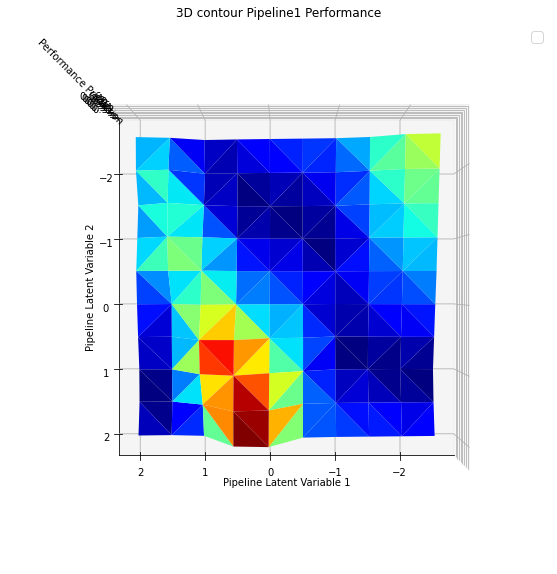

No handles with labels found to put in legend.


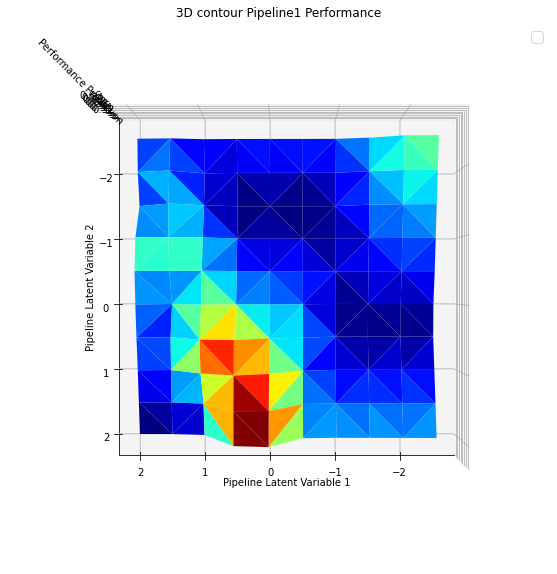

No handles with labels found to put in legend.


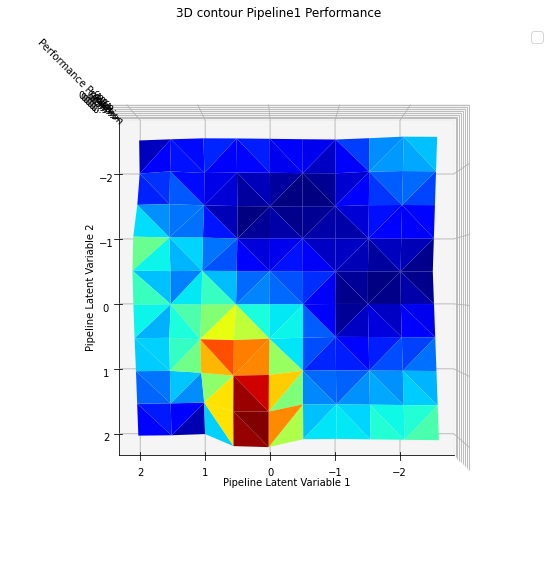

No handles with labels found to put in legend.


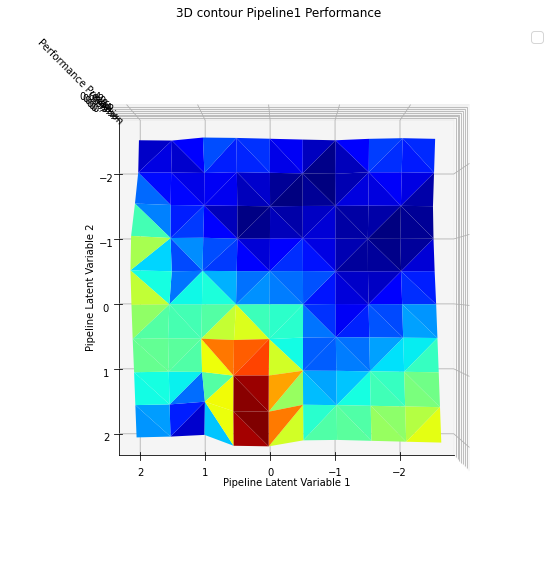

No handles with labels found to put in legend.


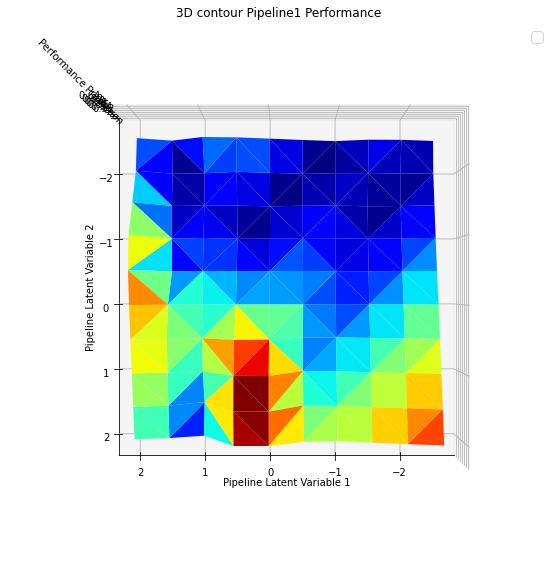

No handles with labels found to put in legend.


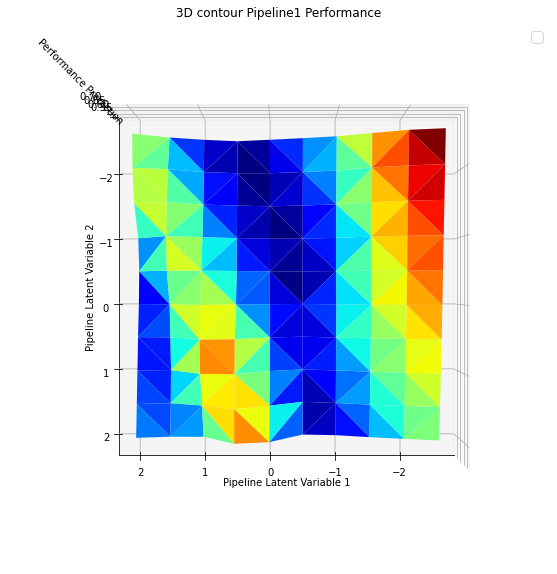

No handles with labels found to put in legend.


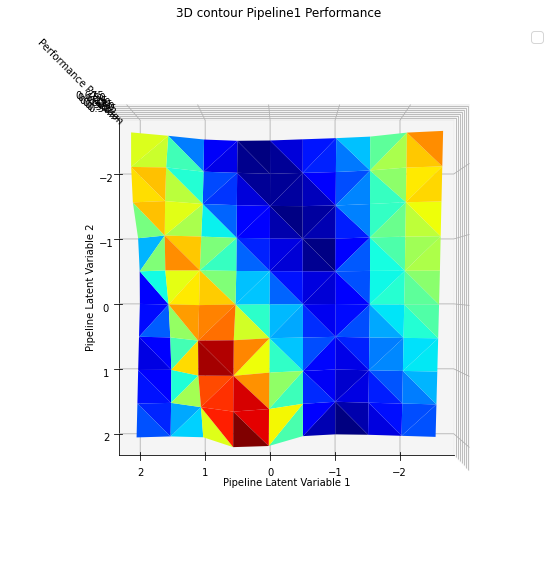

No handles with labels found to put in legend.


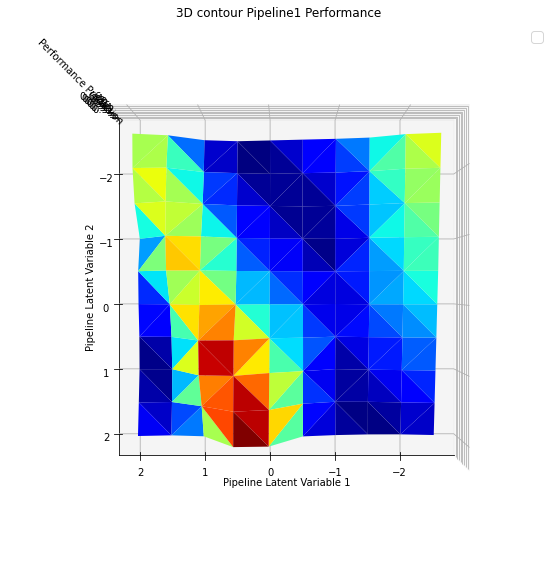

No handles with labels found to put in legend.


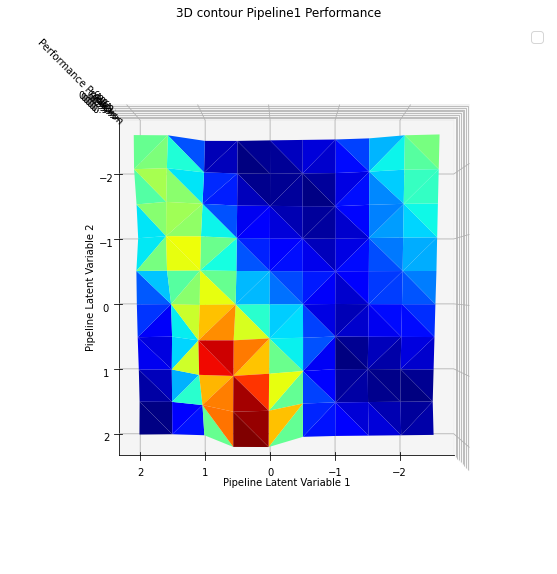

No handles with labels found to put in legend.


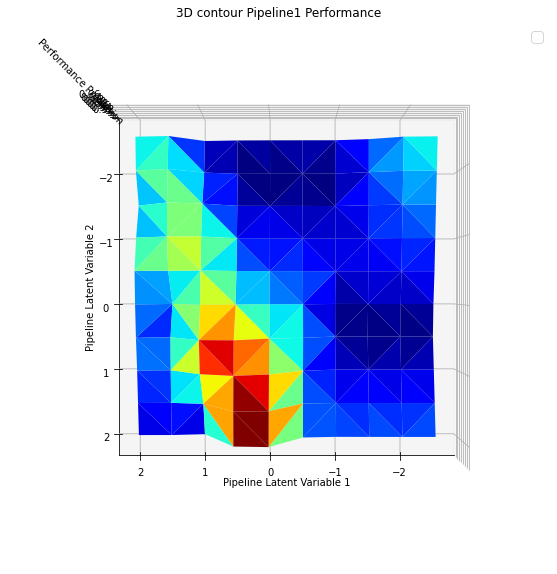

No handles with labels found to put in legend.


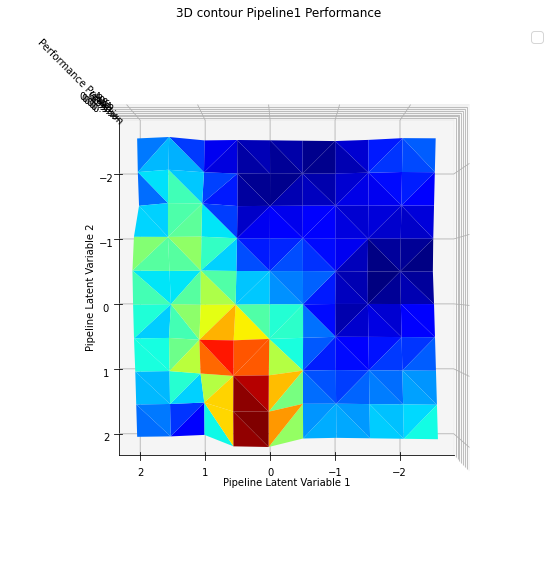

No handles with labels found to put in legend.


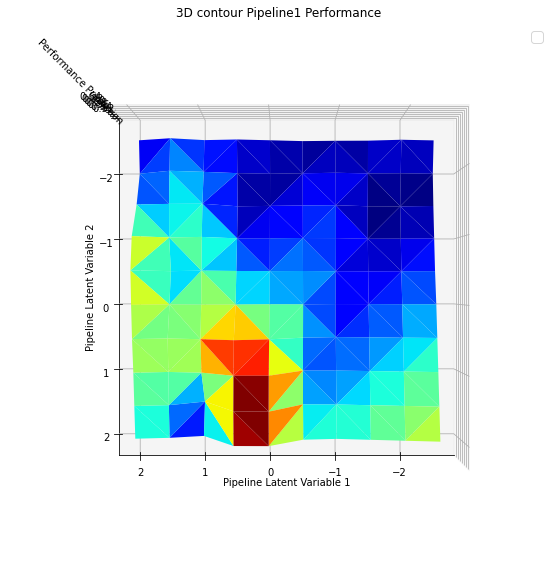

No handles with labels found to put in legend.


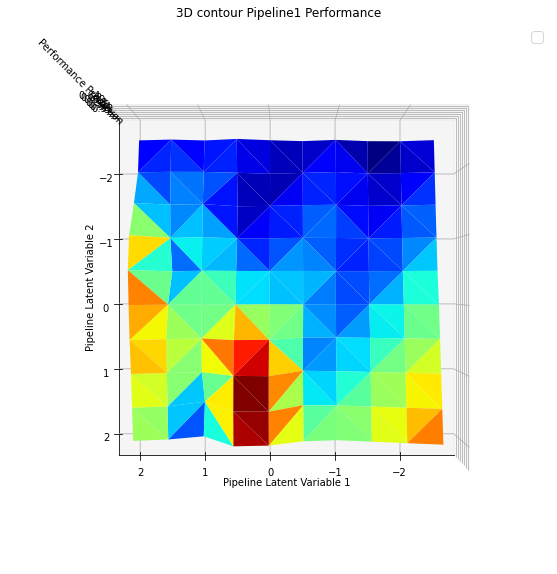

No handles with labels found to put in legend.


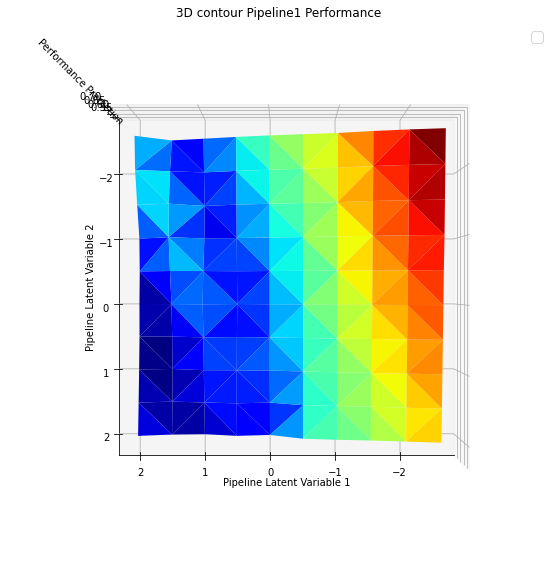

No handles with labels found to put in legend.


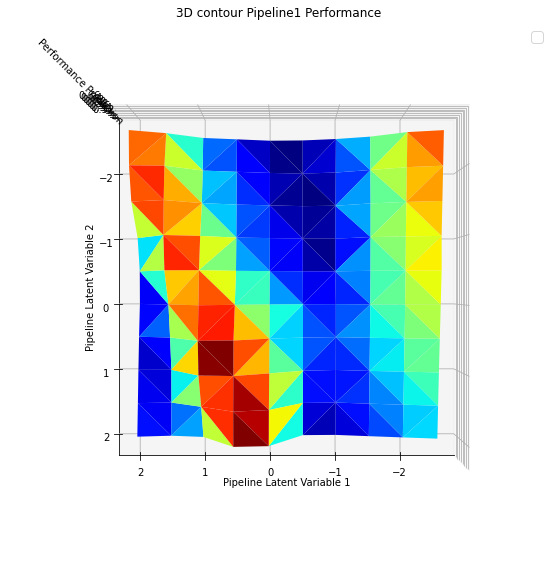

No handles with labels found to put in legend.


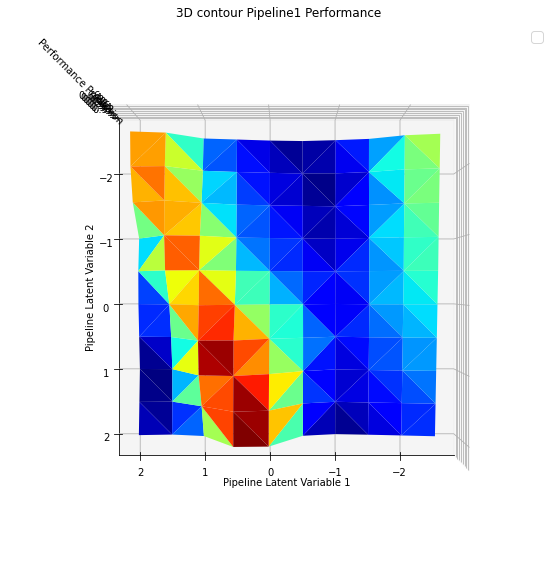

No handles with labels found to put in legend.


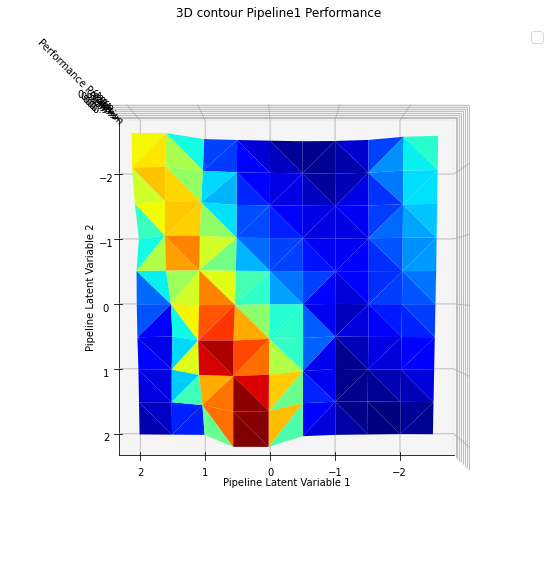

No handles with labels found to put in legend.


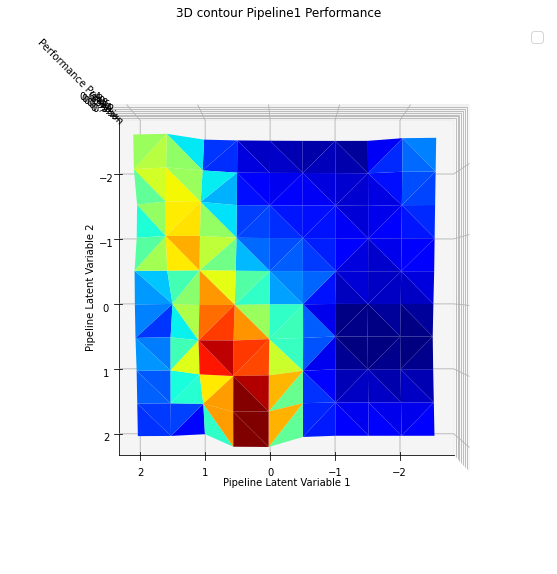

No handles with labels found to put in legend.


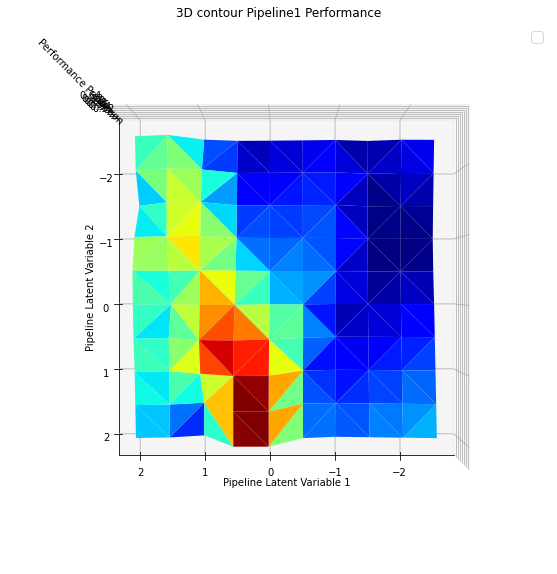

No handles with labels found to put in legend.


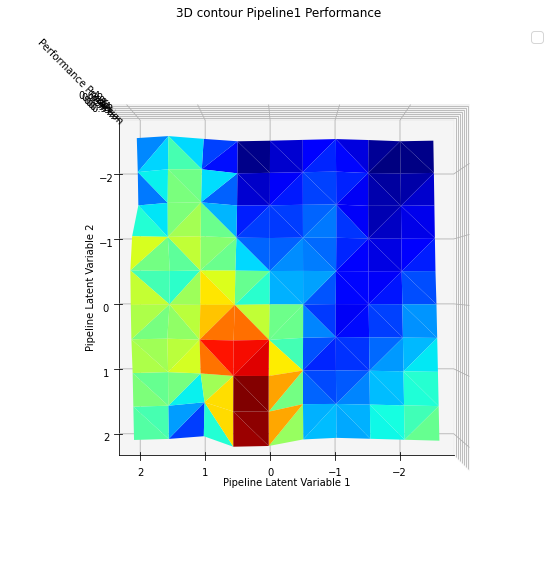

No handles with labels found to put in legend.


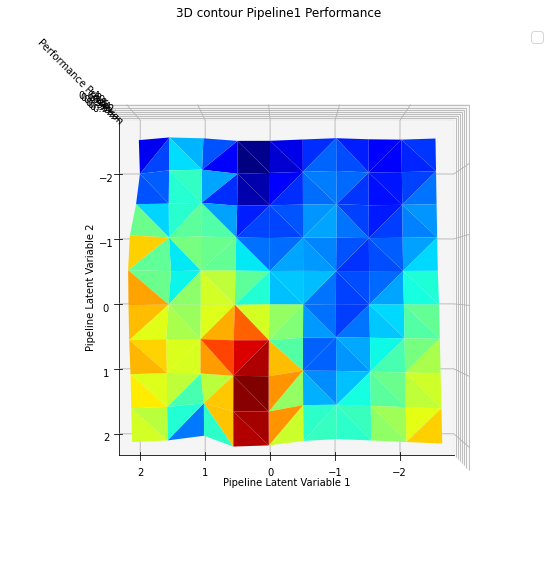

No handles with labels found to put in legend.


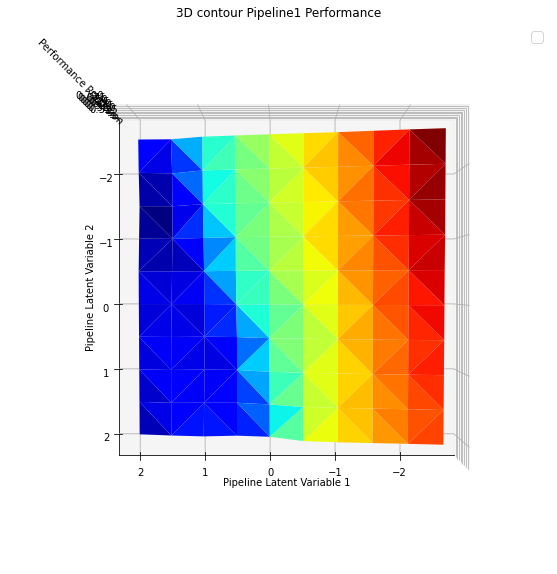

No handles with labels found to put in legend.


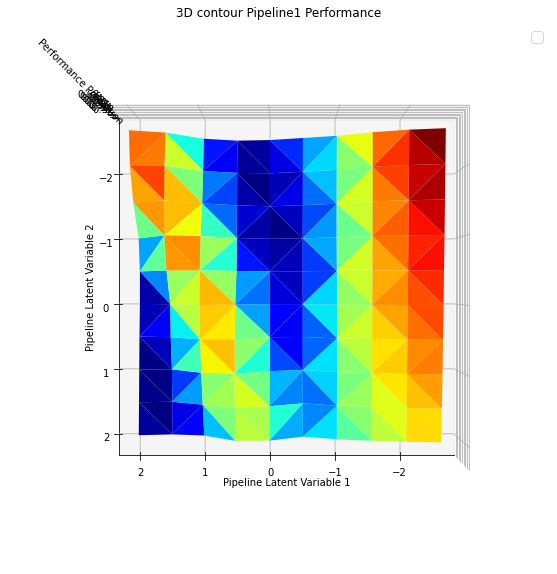

No handles with labels found to put in legend.


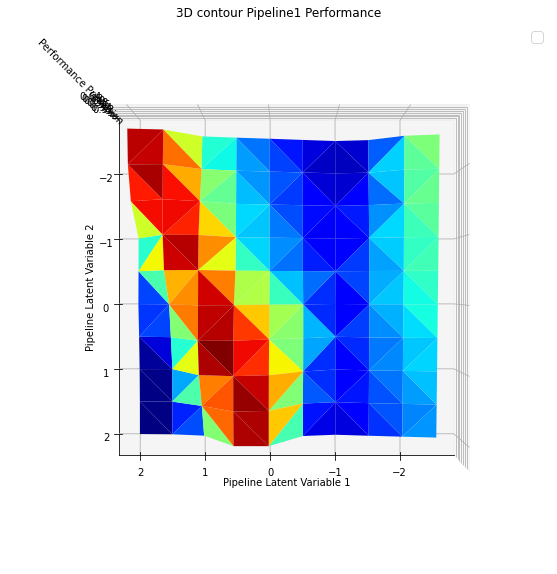

No handles with labels found to put in legend.


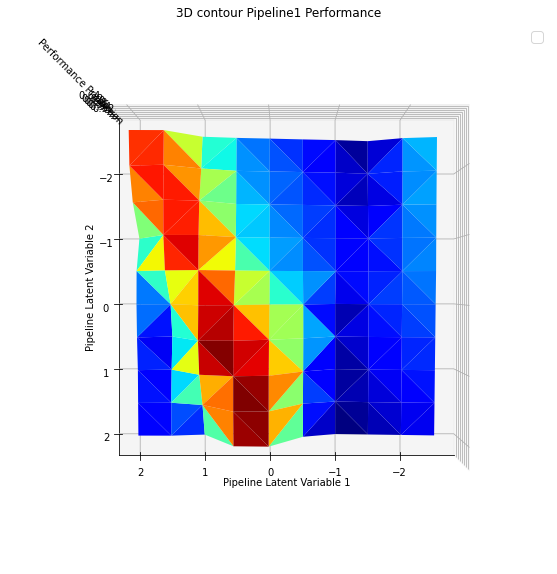

No handles with labels found to put in legend.


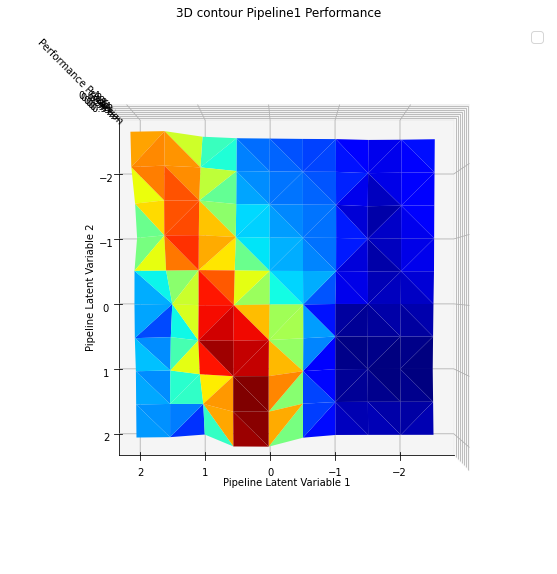

No handles with labels found to put in legend.


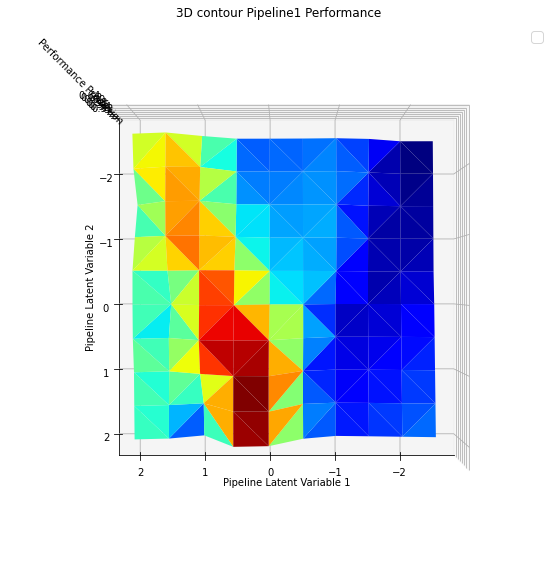

No handles with labels found to put in legend.


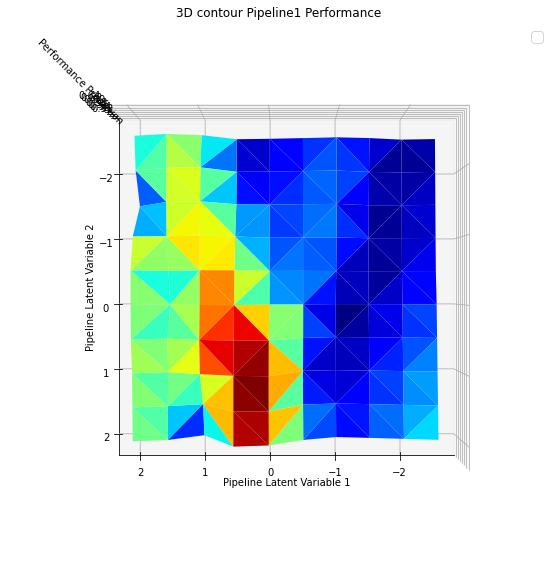

No handles with labels found to put in legend.


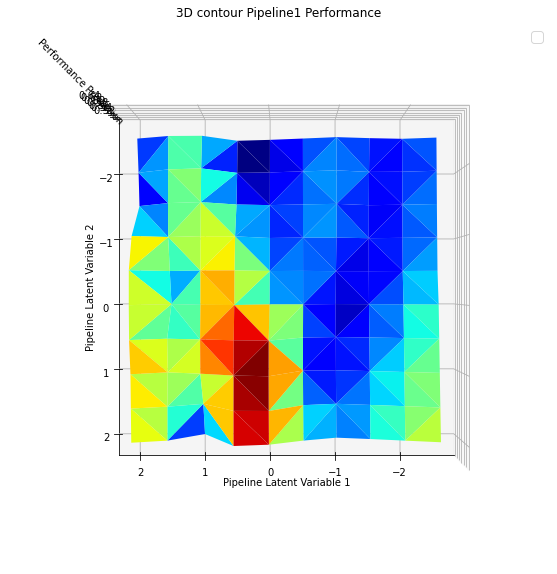

No handles with labels found to put in legend.


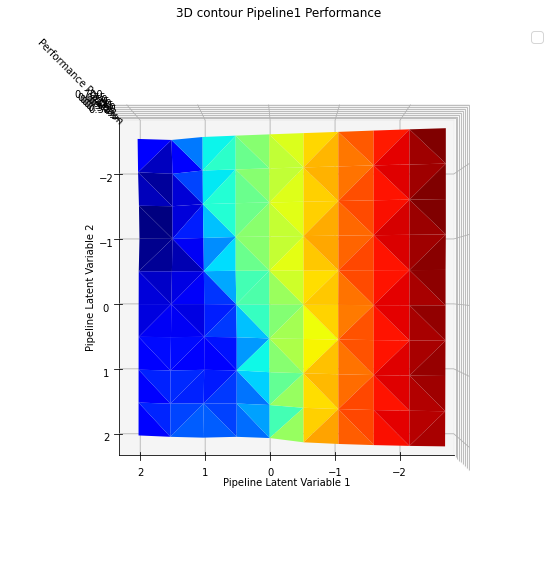

No handles with labels found to put in legend.


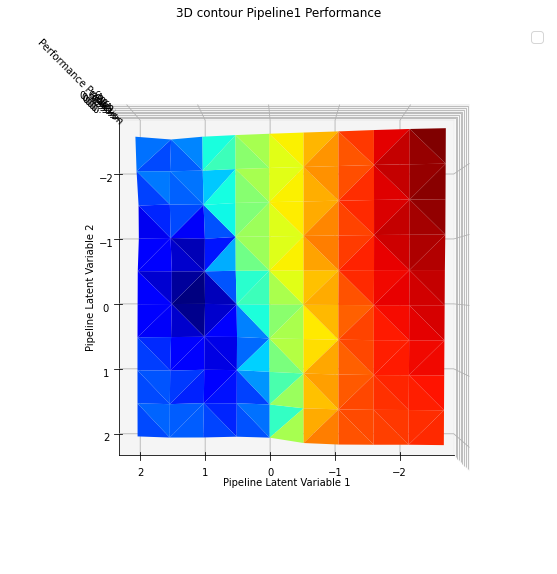

No handles with labels found to put in legend.


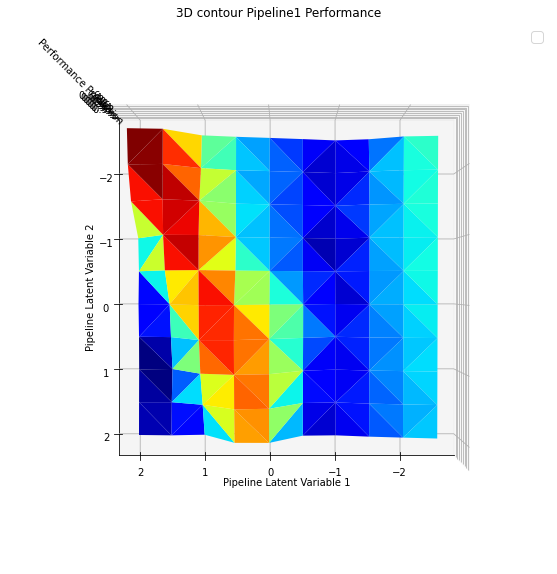

No handles with labels found to put in legend.


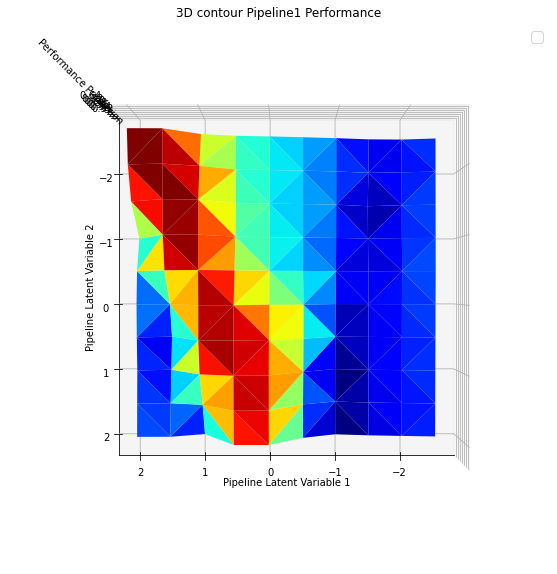

No handles with labels found to put in legend.


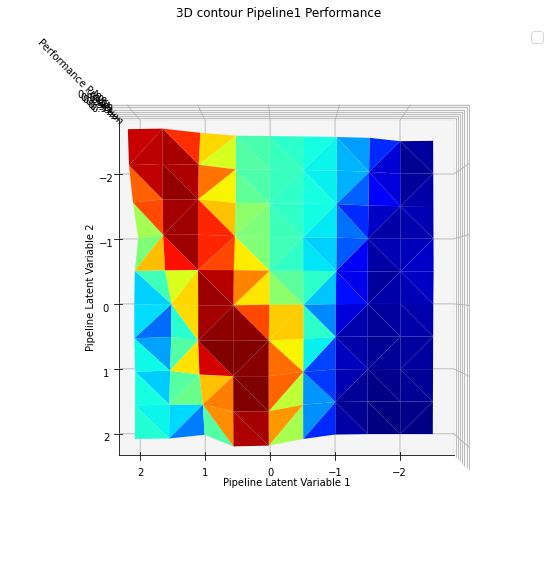

No handles with labels found to put in legend.


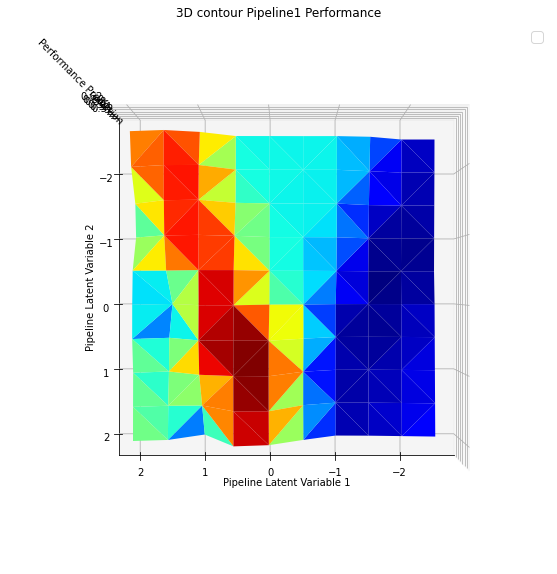

No handles with labels found to put in legend.


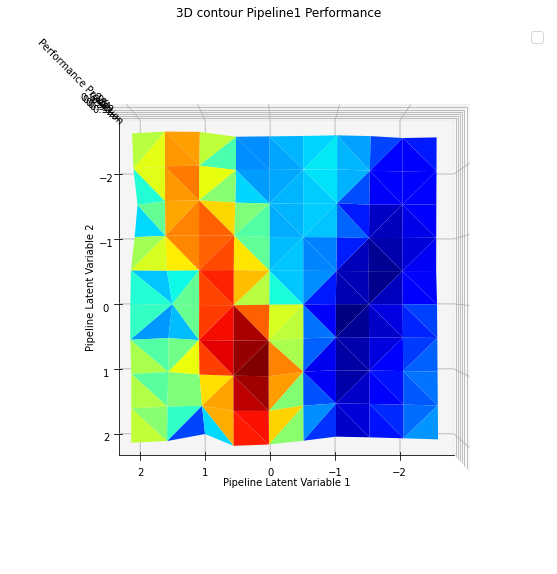

No handles with labels found to put in legend.


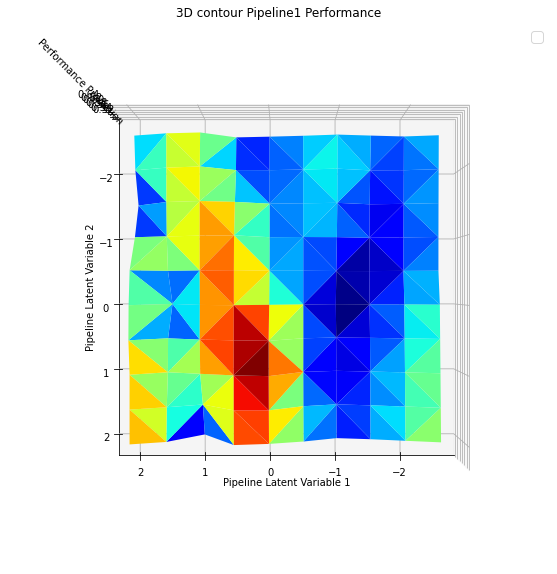

No handles with labels found to put in legend.


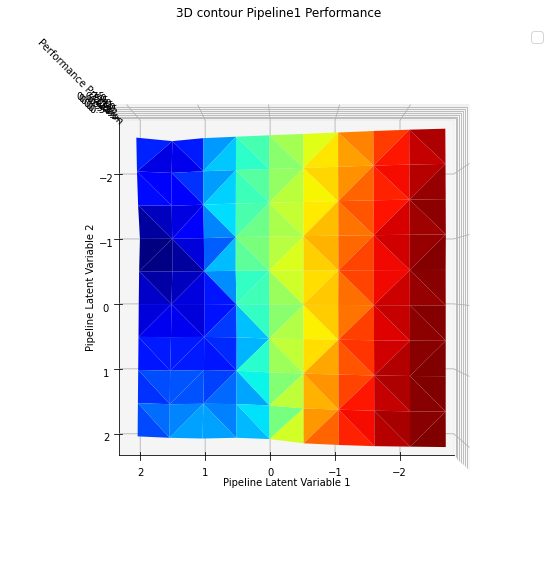

No handles with labels found to put in legend.


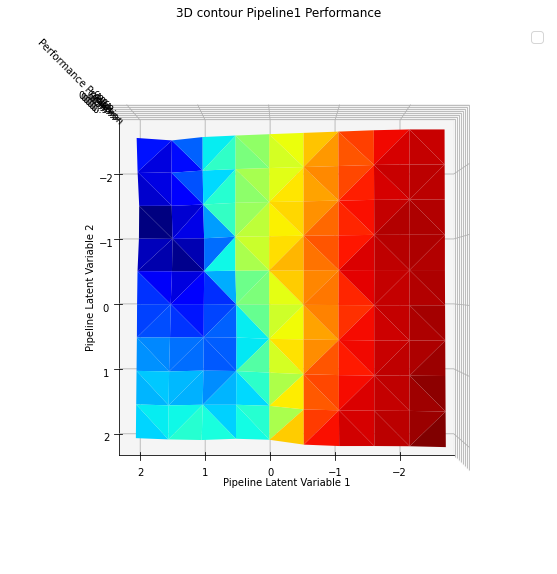

No handles with labels found to put in legend.


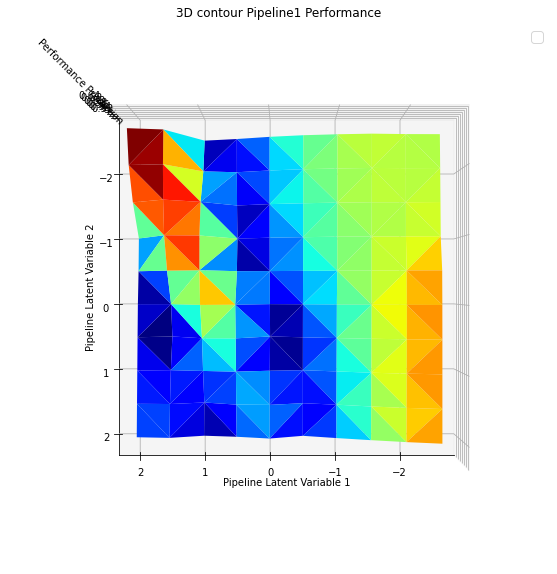

No handles with labels found to put in legend.


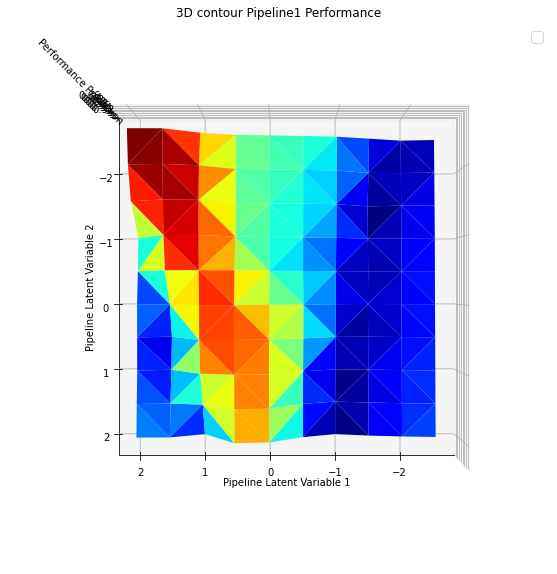

No handles with labels found to put in legend.


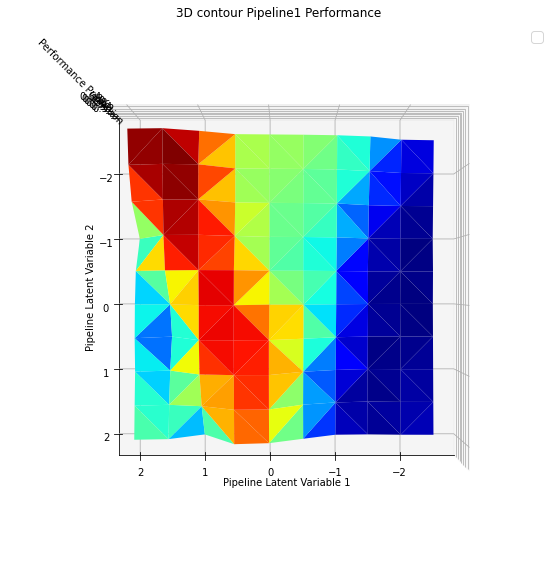

No handles with labels found to put in legend.


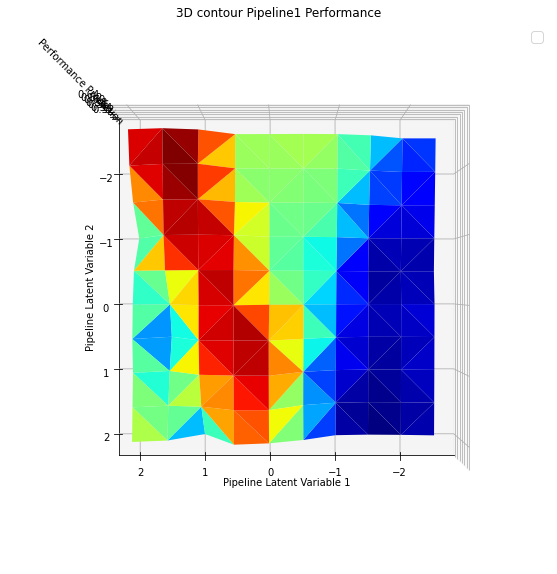

No handles with labels found to put in legend.


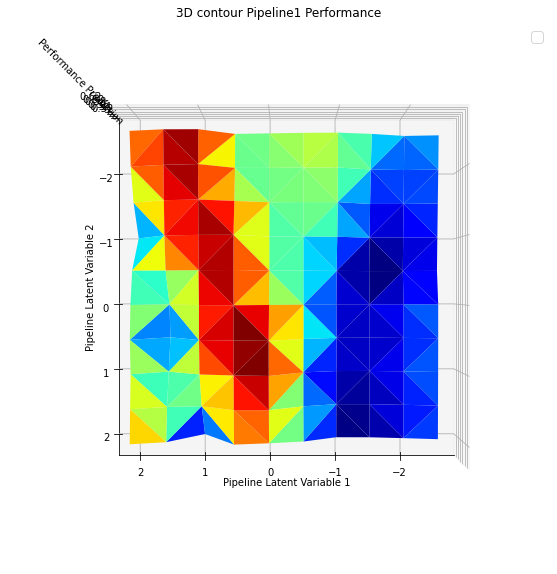

No handles with labels found to put in legend.


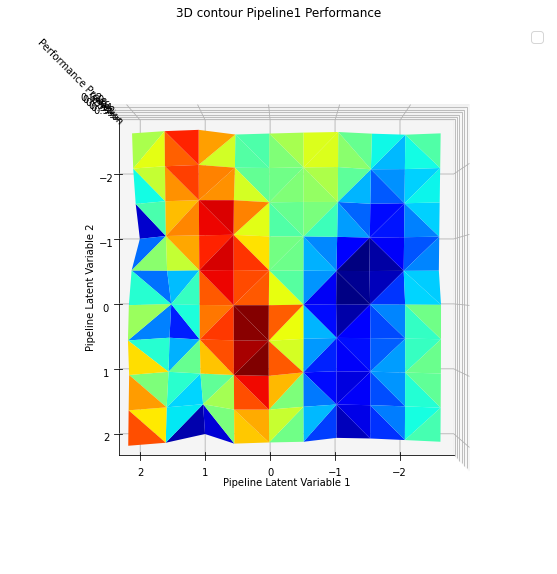

No handles with labels found to put in legend.


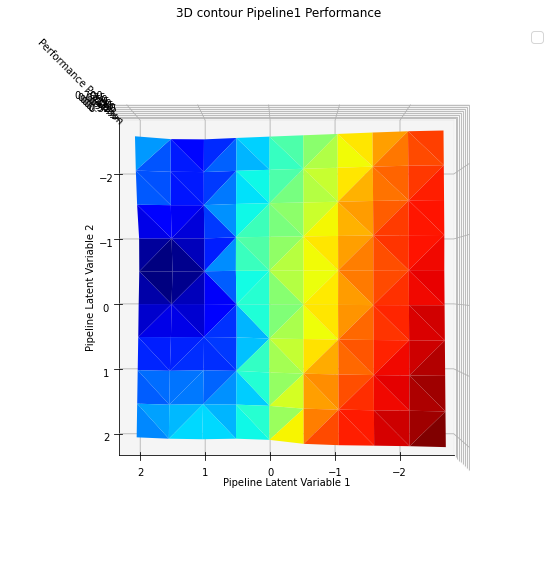

No handles with labels found to put in legend.


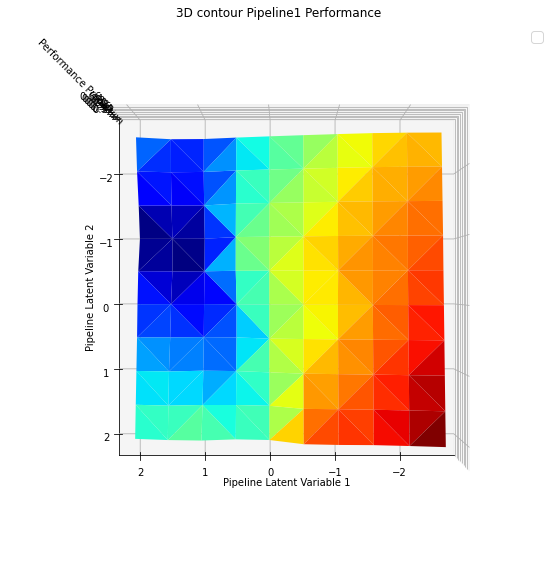

No handles with labels found to put in legend.


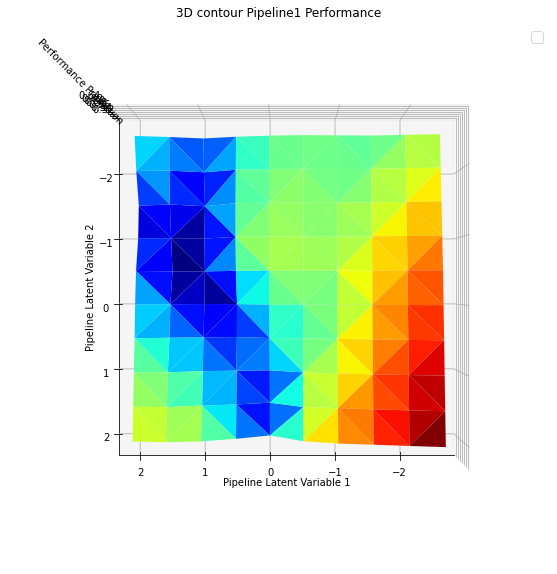

No handles with labels found to put in legend.


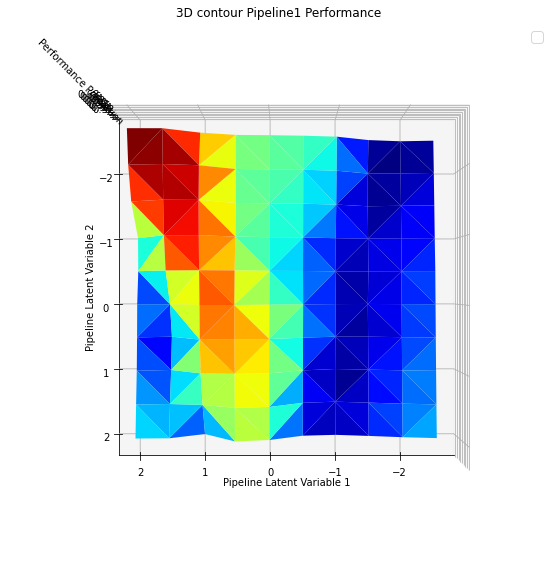

No handles with labels found to put in legend.


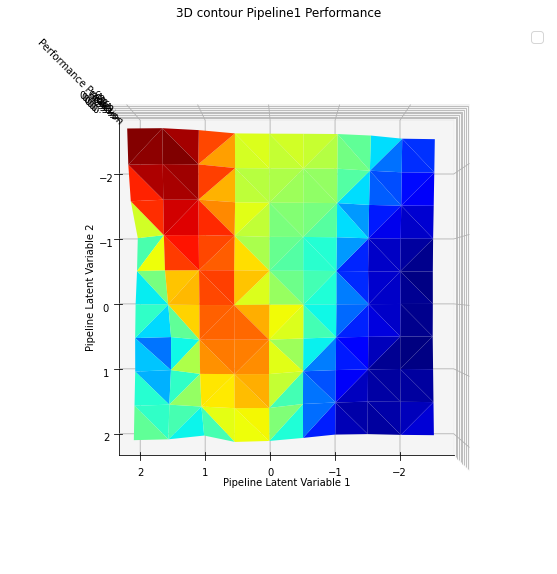

No handles with labels found to put in legend.


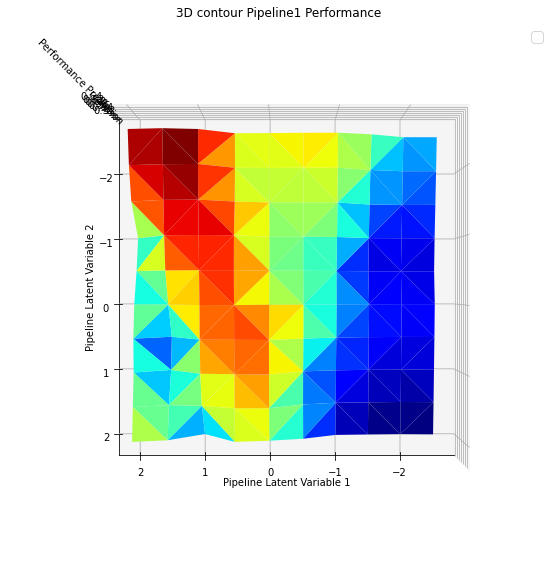

No handles with labels found to put in legend.


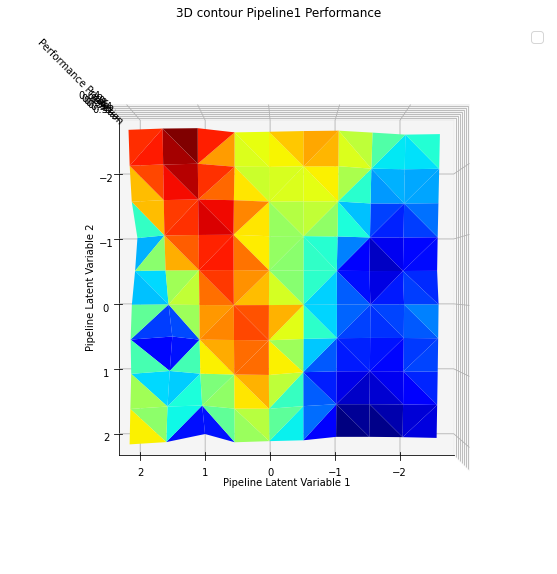

No handles with labels found to put in legend.


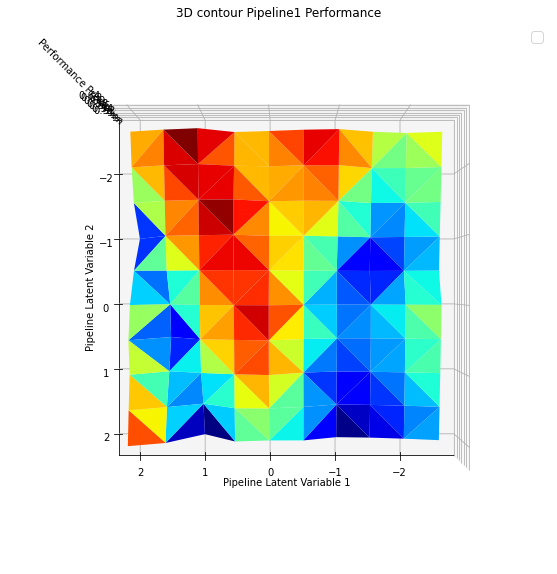

No handles with labels found to put in legend.


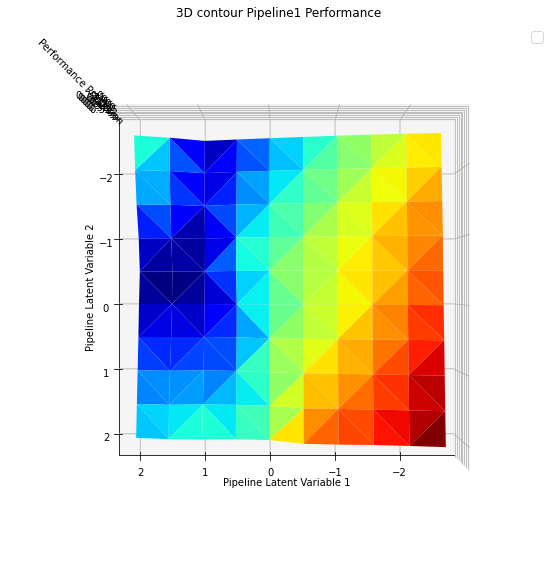

No handles with labels found to put in legend.


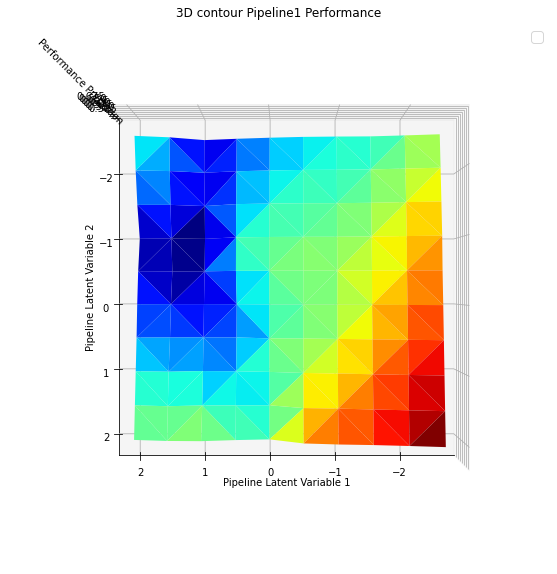

No handles with labels found to put in legend.


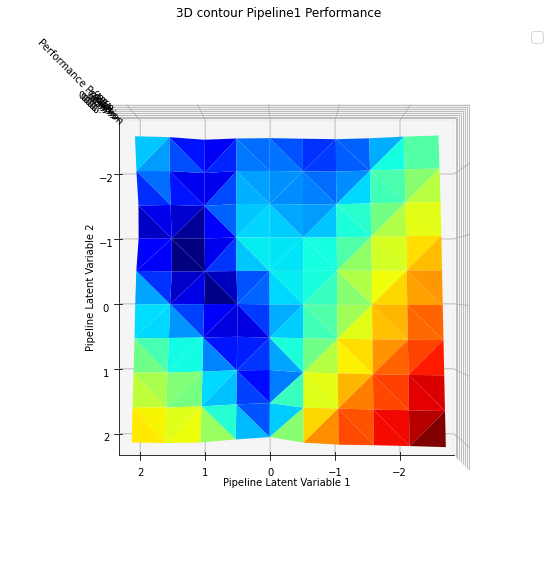

No handles with labels found to put in legend.


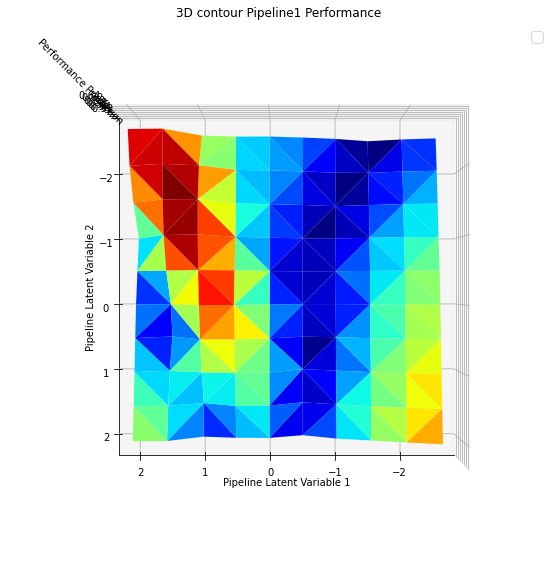

No handles with labels found to put in legend.


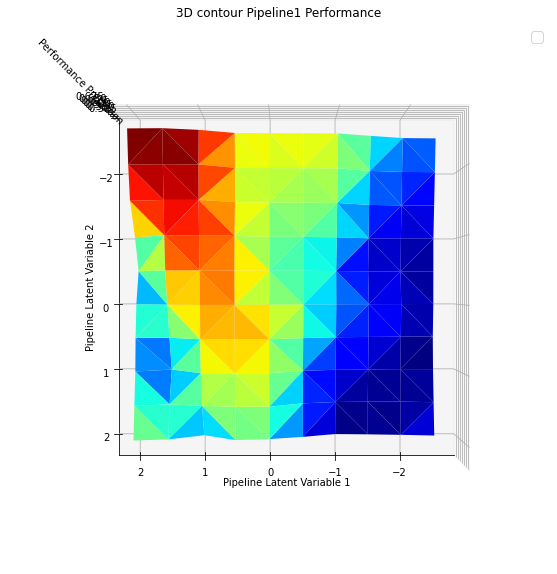

No handles with labels found to put in legend.


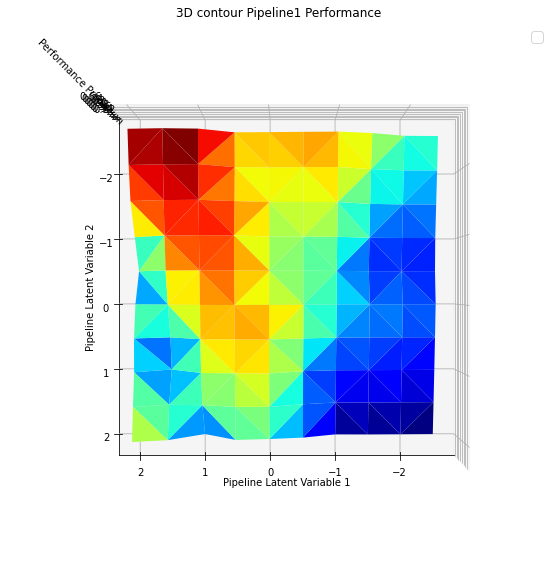

No handles with labels found to put in legend.


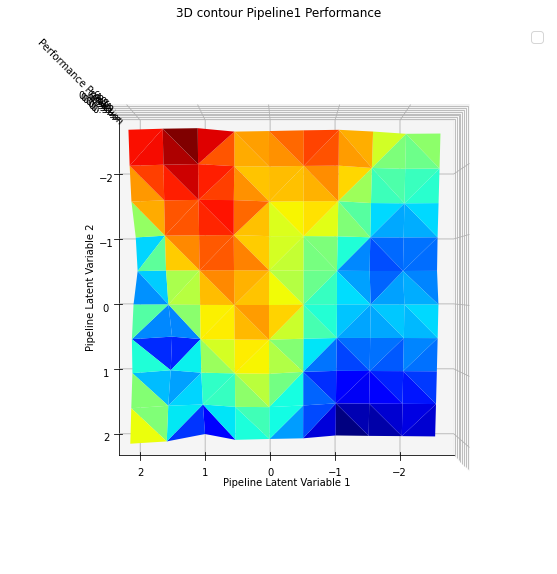

No handles with labels found to put in legend.


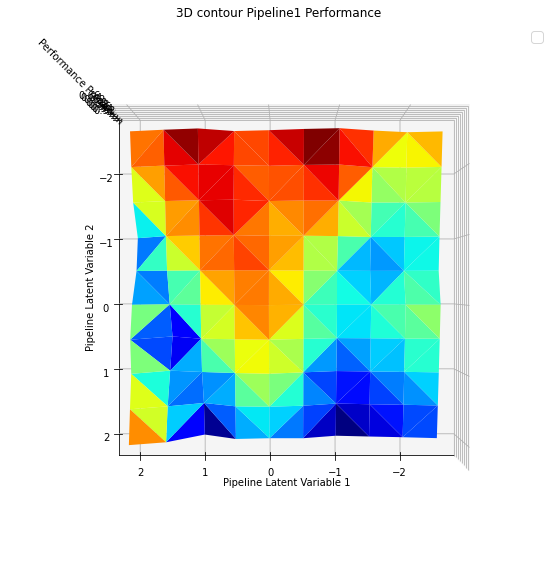

IndexError: index 64 is out of bounds for axis 0 with size 64

In [ ]:
for i in range(pred_matrix.shape[1]):
    YZ = pred_matrix[i,:]
    #visualize
    figure = plt.figure(figsize = [15, 10])
    ax = plt.axes(projection='3d')
    # Plot the surface.
    tri = mtri.Triangulation(Y[:, 0],Y[:, 1])
    ax.plot_trisurf(Y[:, 0],Y[:, 1], YZ, triangles=tri.triangles, cmap=plt.cm.jet)
    # surf = ax.plot_surface(Y1, Y2, YZ, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_xlabel('Pipeline Latent Variable 1')
    ax.set_ylabel('Pipeline Latent Variable 2')
    ax.set_zlabel('Performance Prediction')
    ax.set_title('3D contour Pipeline1 Performance')
    # ax.set_zlim(zmin=0.6, zmax =1)
    ax.view_init(90, 90)
    ax.legend(fontsize=15)
#     filename = 'figures/VAE-NCF/pipelines/individuals/Data%d_10epoch_1lambda1_10lambda2_e-5lambda3.jpg'%(i+1)
#     plt.savefig(filename, bbox_inches = 'tight')
    plt.show()